# Sentiment Analysis of Taylor Swift Lyrics
Analyzing the sentiment of Taylor Swift lyrics by album.
[Source](https://github.com/shaynak/taylor-swift-lyrics/blob/main/songs.csv)

## 1. Library Imports

In [2]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Loading and Understanding

In [3]:
# Load song data
songs = pd.read_csv("data/songs.csv")

In [4]:
# How many albums are currently in this dataset
len(songs["Album"].unique())

31

## 3. EDA and Data Cleaning

In [5]:
# Map the albums to only what's in the album list
# The album should say "Other" if it's not in the list

album_list = ["Red", "Lover", "1989", "Midnights", "Speak Now", "Fearless", "Reputation", "folklore", "evermore", "Taylor Swift"]

def album_mapper(original_name):
    for album_name in album_list:
        if album_name.upper() in original_name.upper():
            return album_name
    
    return "Other"


songs["Album"] = songs["Album"].apply(album_mapper)



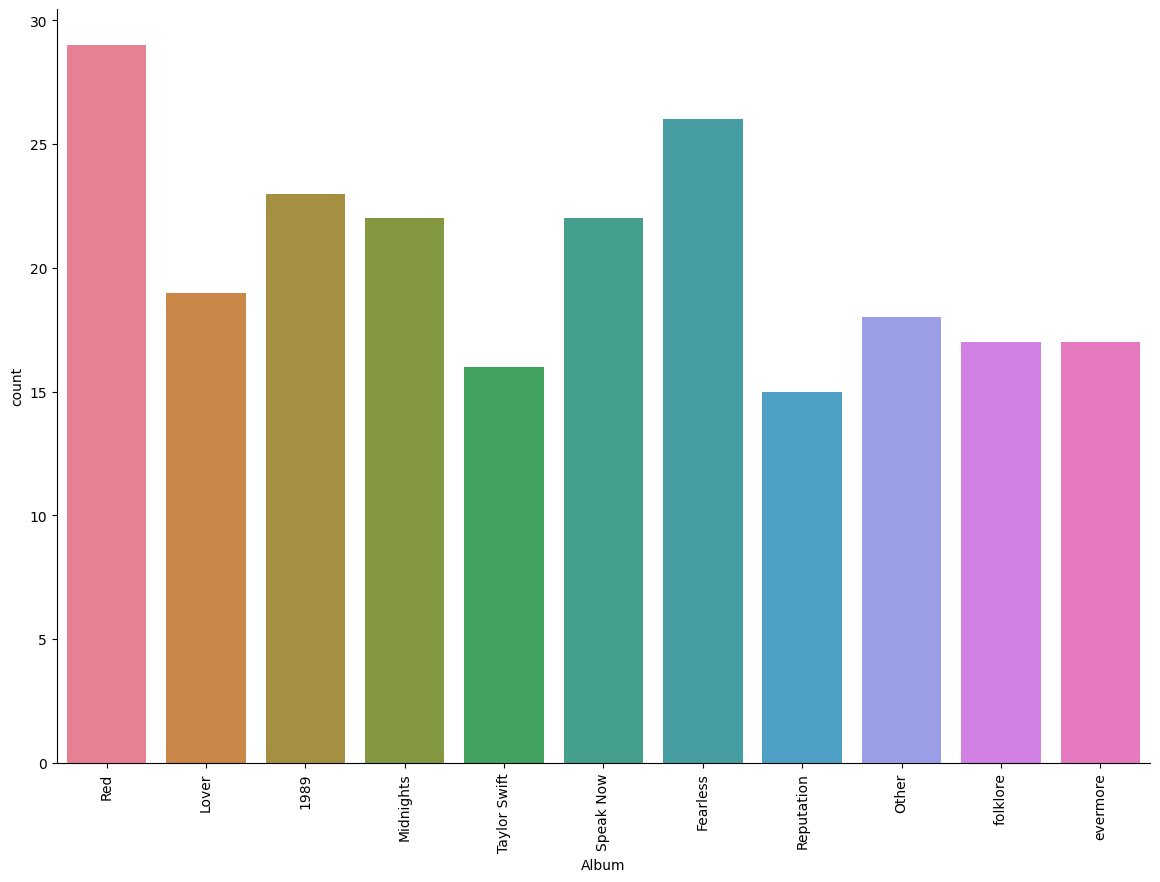

In [6]:
ax = sns.catplot(data=songs, x='Album', kind="count", hue='Album', height=8.27, aspect=11.7/8.27)
plt.xticks(rotation='vertical')
plt.show()

## 4. Sentiment Analysis of all the lyrics

In [7]:
# Identify the sentiments of the lyrics of each song
sia = SentimentIntensityAnalyzer()

def getScore(lyrics):
    scores = sia.polarity_scores(lyrics)
    return scores['neg'], scores['pos'], scores['neu'], scores['compound']

songs[['Negative', 'Positive', 'Neutral', 'Compound']] = songs['Lyrics'].apply(lambda x: pd.Series(getScore(x)))

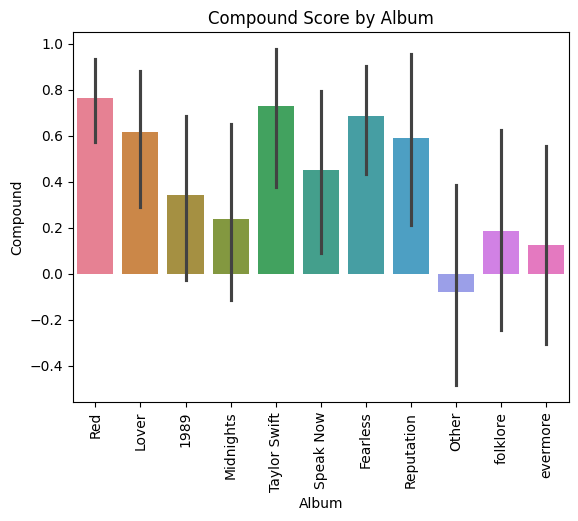

In [8]:
# Graph it
ax = sns.barplot(data=songs, x='Album', y='Compound', hue='Album')
ax.set_title('Compound Score by Album')
plt.xticks(rotation='vertical')
plt.show()

## 5. Sentiment Analysis of just the Chorus

In [9]:
# Map the Lyrics to just the Chorus
# Every Chorus section starts with [Chorus] and ends at the 
# beginning of the next section. You know where the next 
# section starts because it'll say [Bridge] or [Outro] etc.

def getChoruses(lyrics: str):
    # Find first instance of chorus
    chor_pos = lyrics.find("[Chorus]")

    # If none found, return
    if (chor_pos == -1):
        return ""

    # Remove everything before chorus
    lyrics = lyrics[chor_pos+10:]

    # Find next "[" (indicates a new section)
    empty_pos = lyrics.find("[")

    # Use substring to return only the chorus
    return lyrics[0:empty_pos]

songs['Lyrics'] = songs['Lyrics'].apply(getChoruses)

In [10]:
# Identify the sentiments of the chorus of each song
songs[['Negative', 'Positive', 'Neutral', 'Compound']] = songs['Lyrics'].apply(lambda x: pd.Series(getScore(x)))

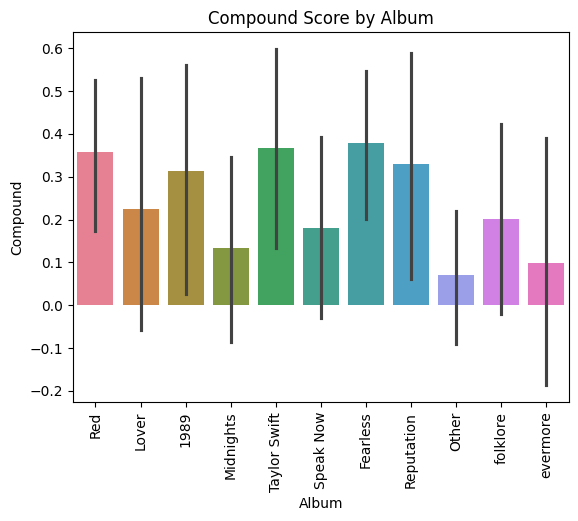

In [11]:
# Graph it
ax = sns.barplot(data=songs, x='Album', y='Compound', hue='Album')
ax.set_title('Compound Score by Album')
plt.xticks(rotation='vertical')
plt.show()